In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/sample_data/점수파일_최종11.csv',encoding = 'euc-kr')

In [4]:
data1=data[['plant_socre','passenger_score','transport_score']]

In [5]:
data1.describe()

,plant_socre,passenger_score,transport_score
count,80.000000,80.000000,80.00000
mean,25.700000,467.923654,26.75000
std,33.782401,320.883930,13.23067
min,1.000000,106.829861,3.00000
25%,5.000000,228.892449,18.75000
50%,9.000000,365.249669,26.50000
75%,36.500000,570.555166,33.00000
max,191.000000,1473.689964,64.00000


엔트로피 가중치 산정방법을 이용하기 전에 데이터 표준화 진행

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data1)

In [7]:
data_scaled

array([[1.        , 0.30590437, 0.06557377],
       [0.33157895, 0.01885658, 0.        ],
       [0.49473684, 0.0611899 , 0.37704918],
       [0.13684211, 0.84425131, 0.44262295],
       [0.14736842, 0.56365682, 0.14754098],
       [0.22105263, 0.86165385, 0.37704918],
       [0.01578947, 0.02943321, 1.        ],
       [0.14736842, 0.22956784, 0.39344262],
       [0.1       , 0.03557495, 0.49180328],
       [0.14210526, 0.18108328, 0.55737705],
       [0.45263158, 0.84192644, 0.3442623 ],
       [0.13157895, 0.54755019, 0.67213115],
       [0.28947368, 0.78177729, 0.47540984],
       [0.54736842, 0.17523604, 0.36065574],
       [0.74736842, 0.18982493, 0.06557377],
       [0.37368421, 0.29474206, 0.37704918],
       [0.36315789, 0.31367639, 0.1147541 ],
       [0.24210526, 0.45078858, 0.24590164],
       [0.22105263, 0.18829688, 0.45901639],
       [0.15263158, 0.15108488, 0.47540984],
       [0.01578947, 0.11767855, 0.3442623 ],
       [0.01578947, 0.22446119, 0.39344262],
       [0.

In [8]:
data_trans = pd.DataFrame(data_scaled, columns = ['plantscore','passengerscore','transportscore'])

In [81]:
data_trans

,plantscore,passengerscore,transportscore
0,1.000000,0.305904,0.065574
1,0.331579,0.018857,0.000000
2,0.494737,0.061190,0.377049
3,0.136842,0.844251,0.442623
4,0.147368,0.563657,0.147541
...,...,...,...
75,0.115789,0.378704,0.459016
76,0.015789,0.209135,0.163934
77,0.036842,0.700987,0.327869
78,0.221053,0.043813,0.131148


엔트로피 가중치 산정방법

In [10]:
import math

In [11]:
k = -1/math.log(80)

상수 k는 우리가 평가하고자하는 공원이 80개이므로 위와 같음

In [84]:
temp = [0,0,0]
j=0
for column in data_trans.columns:
  for i in range(len(data_trans)):
    if(data_trans[column].iloc[i] != 0):
      temp[j]=temp[j]+(data_trans[column].iloc[i]*math.log(data_trans[column].iloc[i]))
  j=j+1    


In [85]:
print(temp)

[-14.184331637118627, -20.757026469062055, -24.190474263306697]


각 피쳐마다 엔트로피 계산(1)

In [86]:
i = 0
res = [0,0,0]
for i in range(3):
  res[i] = temp[i]*k

엔트로피 계산(2)

In [87]:
print('식물점수에 관한 엔트로피:',res[0])
print('이용객점수에 관한 엔트로피:',res[1])
print('대중교통 관한 엔트로피:',res[2])

식물점수에 관한 엔트로피: 3.236934144781676
이용객점수에 관한 엔트로피: 4.736855386687267
대중교통 관한 엔트로피: 5.52038503643349


In [88]:
sum_res = res[0]+res[1]+res[2]

In [92]:
lamda=[0,0,0]
i = 0
for i in range(3):
  lamda[i] = (1-res[i])/(3 - sum_res) 

In [93]:
print('식물점수에 대한 가중치',lamda[0])
print('이용객에 관한 가중치',lamda[1])
print('대중교통에 관한 가중치',lamda[2])

식물점수에 대한 가중치 0.21315960872459477
이용객에 관한 가중치 0.35608854822339653
대중교통에 관한 가중치 0.4307518430520087


위 가중치들을 데이터프레임 피쳐에 곱해줘서 서비스 이용자가 어떤 특성을 중요하게 생각하는 지에 따라 데이터에 가중치를 곱하여서 보여줌

In [94]:
from sklearn.cluster import KMeans

K 평균 군집화를 활용한 데이터 군집

In [95]:
kmeans = KMeans(n_clusters = 3)

In [96]:
kmeans_fitted=kmeans.fit(data_trans)

In [97]:
import matplotlib.pyplot as plt

In [98]:
data_trans['cluster'] = kmeans.labels_

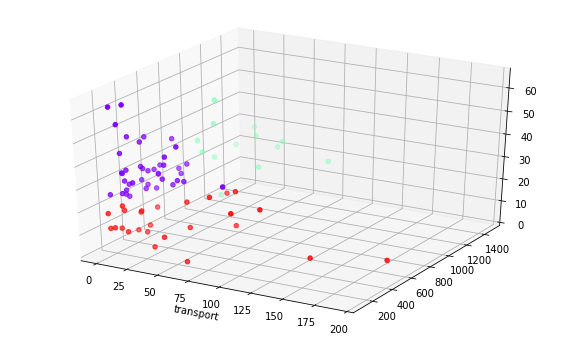

In [99]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data['plant_socre'],data['passenger_score'],data['transport_score'],c = data_trans['cluster'],cmap = 'rainbow')
ax.set_xlabel('plant')
ax.set_xlabel('passenger')
ax.set_xlabel('transport')
plt.show()

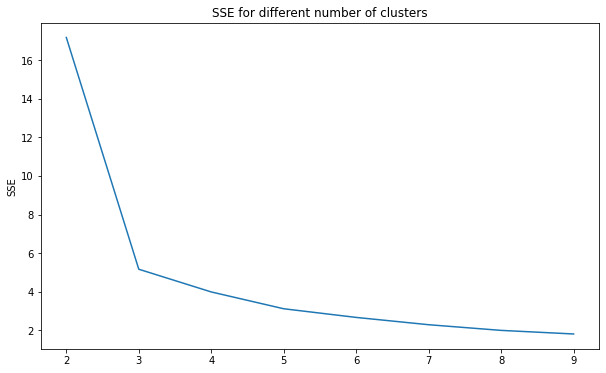

In [100]:
SSE = []
for k in range(2,10):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(data_trans)
  SSE.append(kmeans.inertia_)
  
f,ax = plt.subplots(1,1,figsize = (10,6))
ax.plot(range(2,10),SSE)
ax.set_xticks(range(2,10))
ax.set_ylabel('SSE')
plt.title('SSE for different number of clusters')
plt.show()

팔꿈치 이론을 이용한 최적의 군집갯구 구하는 방법입니다.

In [101]:
import numpy as np

In [102]:
q = np.arange(0,1.1,0.1)

In [103]:
q

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [104]:
quan_p = []
quan_p.append(data1['passenger_score'].quantile(q = q))

In [105]:
quan_p[0][0]

106.8298611

백분위수를 이용해서 저걸 기준으로 이용객이 106명 미만이면 10점 이런식으로 해서 점수를 매긴다음에
만약에 이용객 적은 거에 더 가중치를 주고 싶다 하면 거기다가 위에 구한 엔트로피를 곱해서 시각화해서 보여주면 좋을 것 같습니다.

In [106]:
data1['p_score'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
for m in range(len(data1)):
   if data1['passenger_score'].iloc[m]<=quan_p[0][0]:
     data1['p_score'].iloc[m] = 10
   elif data1['passenger_score'].iloc[m]>quan_p[0][0] or data1['passenger_score'].iloc[m]<=quan_p[1][0]:
     data1['p_score'].iloc[m] = 9

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
